In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np

In [12]:
from get_recommendations_knn import process_embeddings

In [44]:
embeddings_df_scaled = pd.read_csv('clean_data/embeddings_mvp_scaled.csv', index_col = 'url')
embeddings_df_scaled

,0,1,2,3,4,high_carb,high_protein,high_fat,high_sodium,high_sugar
url,,,,,,,,,,
https://glebekitchen.com/miso-chicken-with-maple-and-ginger/,1.038319,-0.164971,0.421026,-1.352943,-0.859075,-0.575257,1.805987,-0.572864,-0.475094,-0.551318
https://glebekitchen.com/tonkotsu-ramen-home/,1.251302,0.514581,0.621095,-1.039136,-0.616171,1.738354,1.805987,1.745614,2.104847,1.813836
https://glebekitchen.com/garlic-ginger-grilled-chicken/,0.751031,0.109048,0.416885,-1.543077,-0.242634,-0.575257,1.805987,1.745614,2.104847,-0.551318
https://glebekitchen.com/japanese-chicken-curry-curry-rice/,0.828632,-0.620772,1.281883,0.379282,0.147137,-0.575257,-0.553714,-0.572864,2.104847,-0.551318
https://glebekitchen.com/chicken-karaage-japanese-fried-chicken/,0.903484,0.365478,0.936441,-0.876407,-0.056973,-0.575257,1.805987,1.745614,2.104847,-0.551318
...,...,...,...,...,...,...,...,...,...,...
https://thewoksoflife.com/cumin-lamb-biang-biang-noodles/,-1.212612,0.898431,0.356800,0.592123,1.285916,1.738354,-0.553714,-0.572864,-0.475094,-0.551318
https://thewoksoflife.com/lamb-stew-spicy-sausage/,0.244983,-0.733703,-0.093265,0.771910,1.703452,-0.575257,-0.553714,-0.572864,-0.475094,-0.551318
https://thewoksoflife.com/lamb-stew/,-0.042567,-0.751606,1.290679,0.302535,1.088066,-0.575257,-0.553714,-0.572864,-0.475094,-0.551318


In [45]:
url_index_mapping = pd.read_csv('clean_data/url_index_mapping.csv', index_col = 'url')
url_index_mapping

,index
url,
https://glebekitchen.com/miso-chicken-with-maple-and-ginger/,0
https://glebekitchen.com/tonkotsu-ramen-home/,1
https://glebekitchen.com/garlic-ginger-grilled-chicken/,2
https://glebekitchen.com/tonkotsu-ramen-broth-home/,3
https://glebekitchen.com/japanese-chicken-curry-curry-rice/,4
...,...
https://thewoksoflife.com/cumin-lamb-biang-biang-noodles/,2041
https://thewoksoflife.com/lamb-stew-spicy-sausage/,2042
https://thewoksoflife.com/lamb-stew/,2043


In [46]:
urls = embeddings_df_scaled.sample(10).index
urls

Index(['https://omnivorescookbook.com/chinese-egg-rolls/',
       'https://glebekitchen.com/miso-ramen-with-chashu-pork/',
       'https://omnivorescookbook.com/pineapple-buns/',
       'https://omnivorescookbook.com/easy-swiss-chard-stir-fry/',
       'https://thewoksoflife.com/stuffed-chicken-breast-sticky-rice/',
       'https://glebekitchen.com/spicy-miso-grilled-chicken/',
       'https://thewoksoflife.com/shrimp-lo-mein/',
       'https://thewoksoflife.com/stir-fried-cabbage-glass-noodles/',
       'https://glebekitchen.com/indian-restaurant-madras-curry/',
       'https://thewoksoflife.com/honey-sriracha-roasted-brussels-sprouts/'],
      dtype='object', name='url')

In [47]:
url_index_mapping.loc[urls]

,index
url,
https://omnivorescookbook.com/chinese-egg-rolls/,782
https://glebekitchen.com/miso-ramen-with-chashu-pork/,13
https://omnivorescookbook.com/pineapple-buns/,997
https://omnivorescookbook.com/easy-swiss-chard-stir-fry/,1130
https://thewoksoflife.com/stuffed-chicken-breast-sticky-rice/,1344
https://glebekitchen.com/spicy-miso-grilled-chicken/,176
https://thewoksoflife.com/shrimp-lo-mein/,1309
https://thewoksoflife.com/stir-fried-cabbage-glass-noodles/,1630
https://glebekitchen.com/indian-restaurant-madras-curry/,133


In [48]:
from get_recommendations_knn import get_recs_knn_average
_, recs = get_recs_knn_average(embeddings_df_scaled, urls)

In [49]:
recs_dict = url_index_mapping.loc[recs]['index'].to_dict()

https://thewoksoflife.com/chicken-curry-takeout/ 1329


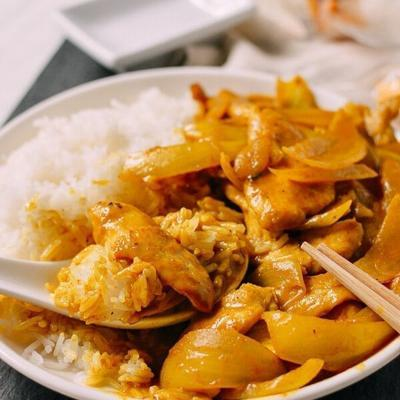

https://thewoksoflife.com/20-minute-congee-recipe/ 1556


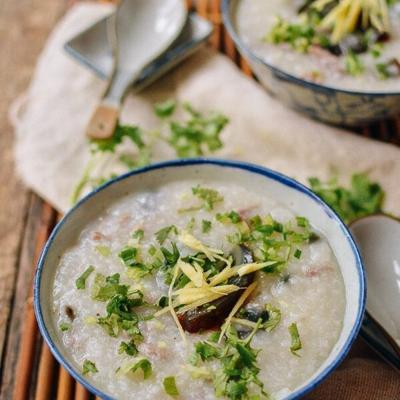

https://omnivorescookbook.com/potato-fried-rice/ 1121


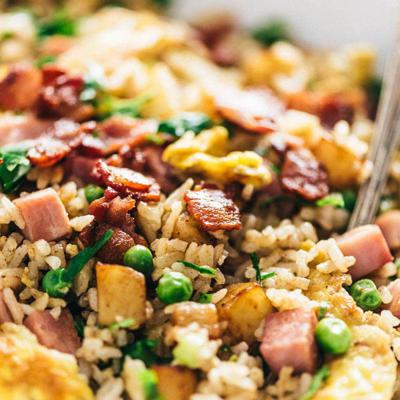

https://omnivorescookbook.com/drunken-chicken/ 745


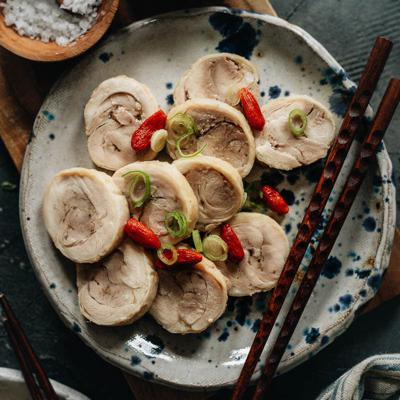

https://thewoksoflife.com/how-to-velvet-chicken-stir-fry/ 1380


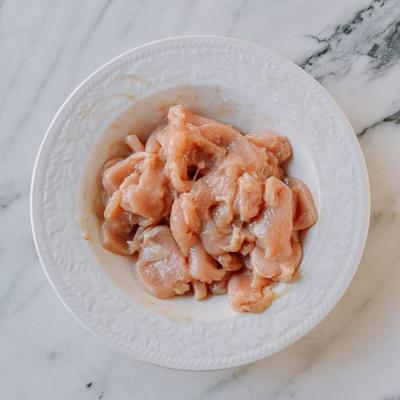

https://thewoksoflife.com/pork-adobo/ 1865


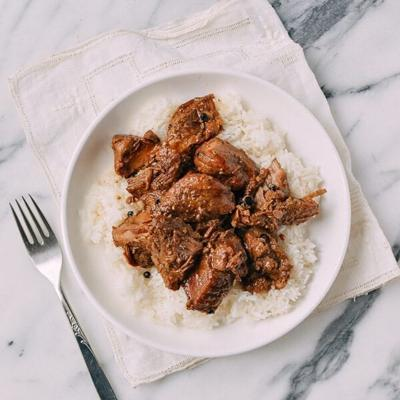

https://omnivorescookbook.com/instant-pot-vegetable-soup/ 1049


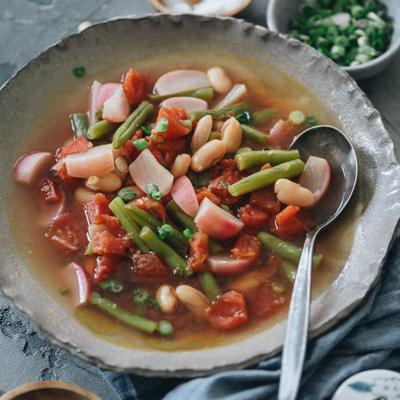

https://thewoksoflife.com/seaweed-egg-drop-soup/ 1828


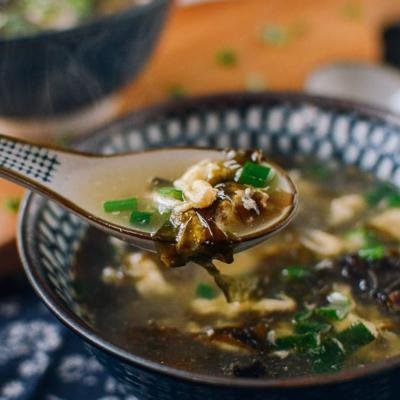

https://thewoksoflife.com/chicken-larb/ 1372


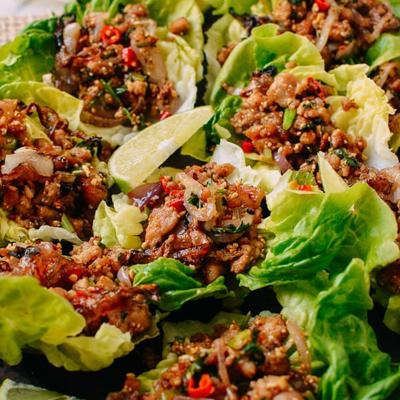

https://thewoksoflife.com/shrimp-stir-fry-shanghai/ 2007


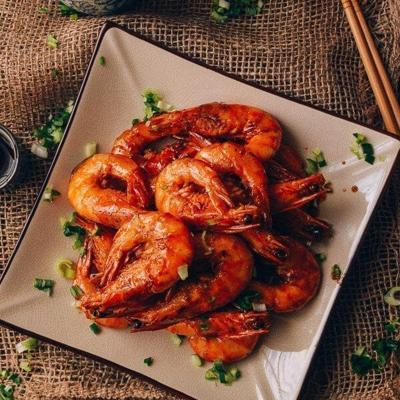

In [50]:
%matplotlib inline
from IPython.display import Image

for url, index in recs_dict.items():
    print(url, index)
    display(Image(f'images_resized/image_{index}.jpg'))